In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 전처리
data = pd.read_csv('./auto-mpg.csv', header=None) # column이 없어서 첫 줄부터 데이터인 경우
data.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

pd.set_option('display.max_column',9) # column 개수 조정
data.info()
data.describe() # horsepower X >> object로 들어가있다. 왜?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
data['horsepower'].unique() # 열의 고유값 확인 >> '?' 존재 확인o

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [10]:
data['horsepower'].replace('?',np.nan,inplace=True) 
# nan값이 많은 경우 대체하기보다는 삭제하는 게 나아서, 특정값으로 대체하는 것이 아니라, nan값으로 두는것.
data.dropna(subset=['horsepower'],axis=0,inplace=True) # dropna : 결측값 있는 행 제거
data['horsepower'] = data['horsepower'].astype('float')

data.describe() # >> horsepower까지 잘 들어간 것 확인 완료

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


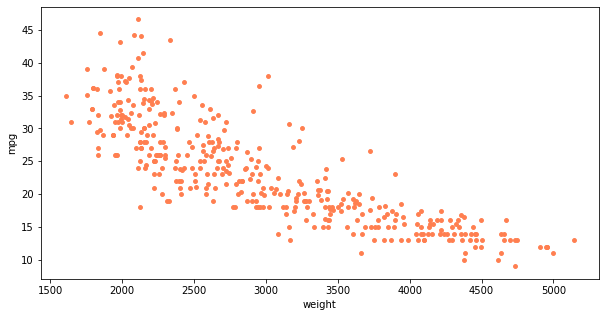

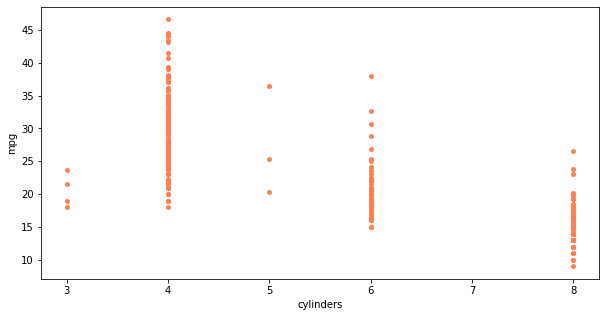

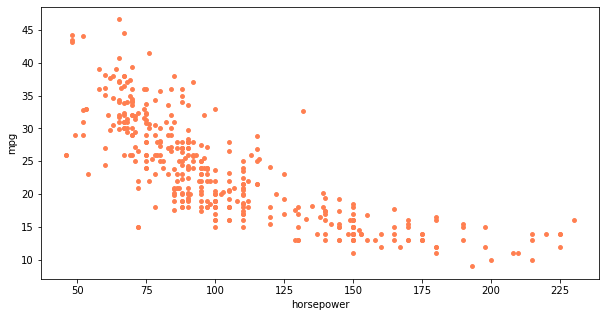

In [12]:
ndf = data[['mpg','cylinders','horsepower','weight']]
# 단순 산점도
ndf.plot(kind='scatter',x='weight',y='mpg',c='coral',s=15,figsize=(10,5))
ndf.plot(kind='scatter',x='cylinders',y='mpg',c='coral',s=15,figsize=(10,5))
ndf.plot(kind='scatter',x='horsepower',y='mpg',c='coral',s=15,figsize=(10,5))
plt.show()
plt.close()

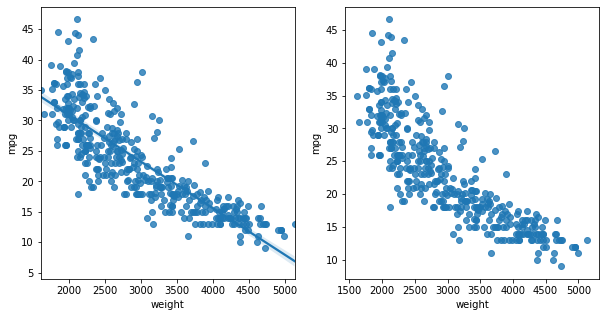

In [13]:
# regression plot
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax1)
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax2,fit_reg=False) # 회귀선 미표시
plt.show()
plt.close()

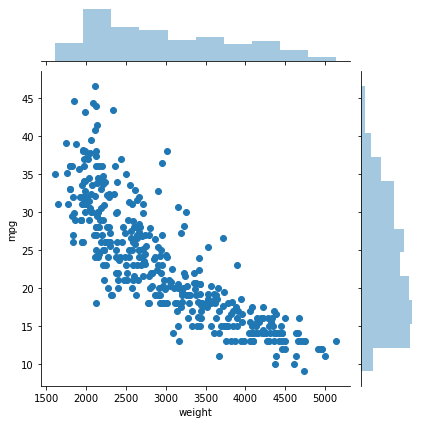

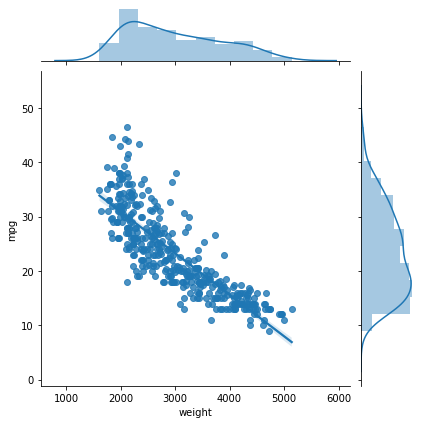

In [14]:
# joint plot
sns.jointplot(x='weight',y='mpg',data=ndf)
sns.jointplot(x='weight',y='mpg',data=ndf,kind='reg')
plt.show()
plt.close()

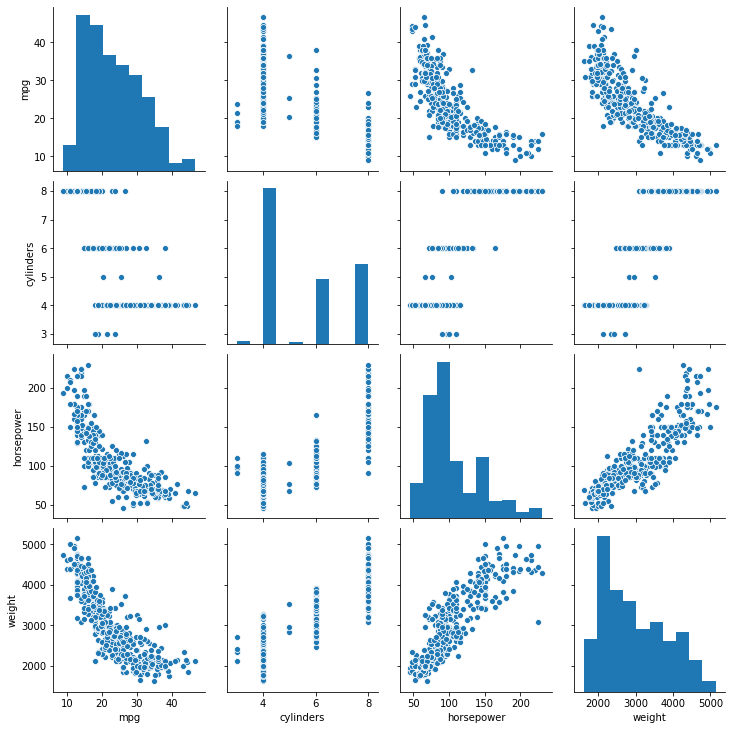

In [15]:
# pair plot 
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

In [ ]:
# >> weight와 horsepower의 독립변수가 종속변수인 mpg와 선형관계를 보인다.

In [18]:
# 선형회귀식
X = ndf[['weight']]
y = ndf['mpg']
# train 데이터와 test 데이터로 나누어 모형 구축
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                test_size=0.3,
                                                random_state=10)
print(f'train data num {len(X_train)}, test data num: {len(X_test)}')

train data num 274, test data num: 118


In [19]:
# train 데이터로 모형 학습 -> test 데이터로 검증
# 기울기, y절편 값 구하기
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,y_train) # 모형 학습

r_square = Lr.score(X_test,y_test) # test 데이터를 적용하여 결정계수 계산
print(r_square)

print(f'기울기 a: {Lr.coef_}')
print(f'y절편 b: {Lr.intercept_}')

0.6822458558299325
기울기 a: [-0.00775343]
y절편 b: 46.710366257280086


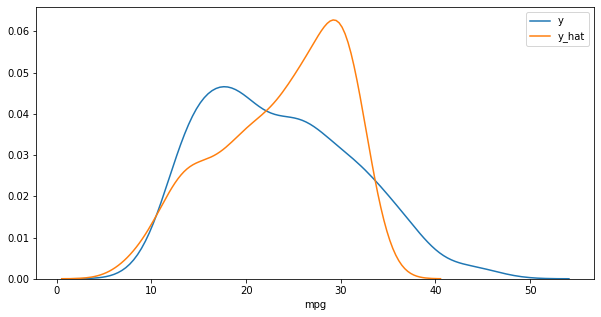

In [20]:
# 학습모형이 예측한 결과와 실제 값 비교
y_hat = Lr.predict(X)
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y') # hist=False 는 히스토그램을 생성하지 않음
ax2 = sns.distplot(y_hat,hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

In [ ]:
# >> 실제값과 예측값 사이 오차가 크게 발생됨. 이런 경우는 선형보다 비선형의 회귀분석을 통한 모형이 적합할 수 있음.